In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Обзор датасета
Посмотрим, какие характеристики есть у датасета
- Датасет состоит из 33 колонок
- Первая колонка - Id студента
- Последняя колонка - метка
- Все признаки и метка категориальные

Итого: в таком наборе данных хорошо подойдет дерево решений, потому что признаки не числовые, а категориальные, нам остается 31 информативный признак

In [541]:
# Получение датасета через pandas
df = pd.read_csv("Higher Education Students Performance.csv")
df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [542]:
# Заменим Grade на бинарный признак
df.loc[(df["GRADE"] < 4), "GRADE"] = 0
df.loc[(df["GRADE"] >= 4), "GRADE"] = 1
df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,1


In [543]:
# Отберем sqrt(n) случайных признаков
n = 31
n_feats = int(np.sqrt(n))

cols = list(df.columns[1:-1])
feats = random.sample(cols, n_feats)
label = "GRADE"
print(n_feats, feats)

i = list("1234567890")
df1 = df[feats + ["GRADE"]]
df1 = df1.rename(columns={c: c[:2] + i.pop(0) for c in feats})
df1

5 ['Cumulative grade point average in the last semester (/4.00)', "Mother's occupation", 'Additional work', 'Attendance to the seminars/conferences related to the department', 'Weekly study hours']


,Cu1,Mo2,Ad3,At4,We5,GRADE
0,1,2,1,1,3,0
1,2,2,1,1,2,0
2,2,2,2,1,2,0
3,3,2,1,1,3,0
4,2,2,2,1,2,0
...,...,...,...,...,...,...
140,3,2,1,1,3,1
141,5,2,2,2,3,1
142,4,2,2,1,2,0
143,5,3,1,1,2,1


In [544]:
# Разделение на тестовую и обучающую выборки
def train_test_split(X, split=0.8):
    data_len = len(X)
    train_len = int(data_len * split)
    test_len = data_len - train_len

    indicies = [i for i in range(data_len)]
    random.shuffle(indicies)
    train_ind = indicies[:train_len]
    test_ind = indicies[train_len:]

    return X.loc[train_ind], X.loc[test_ind]

df_train, df_test = train_test_split(df1)
print(len(df_train), len(df_test))

116 29


# Построение дерева решений
Рассмотрим алгоритм построения дерева решений
- Для каждой вершины, пока не все метки принадлежат одному классу и и можно разделить
-- Выбрать признак
-- Разделить данные в вершине по этому признаку. Значения делятся на три группы: дающие 0, дающие 1, остальные

Поскольку дерево не бинарное, и классов в каждом признаке не много, то можем делать до max(unique_values) веток для каждого признака

In [545]:
# Класс дерева решений
class DecisionTree():
    nodes = None
    is_leaf = False
    text = None
    data = []
    condition = None

    def __init__(self, df, label, condition = ["ROOT", "ROOT"]):
        assert len(df) > 0
        self.condition = condition
        self.text = f"{condition[0]} in {condition[1]}"
        self.label = label

        cur_feat = self.choose_feat(df)
        self.is_leaf = cur_feat is None
        if self.is_leaf:
            self.data = df
            return

        self.nodes = self.separate_data(df, cur_feat)

    def choose_feat(self, df):
        init_entropy = self.entropy(df[self.label].value_counts(normalize=True))
        for feat in df.drop(columns=[self.label]).columns:
            for feat_example in sorted(df[feat].unique()):
                subset = df[df[feat] == feat_example]
                new_entropy = self.entropy(subset[self.label].value_counts(normalize=True))
                if new_entropy < init_entropy:
                    return feat
        return None

    def entropy(df, proportion):
        entropy = 0
        for p in proportion:
            entropy -= p * np.log2(p)
        return entropy

    def separate_data(self, df, feat):
        nodes = []

        only_zeros_feats = []
        only_ones_feats = []
        other_feats = []

        for f_value in sorted(df[feat].unique()):
            subset = df[df[feat] == f_value]
            if len(subset[self.label].unique()) == 1:
                if subset[label].iloc[0] == 0:
                    only_zeros_feats.append(f_value)
                else:
                    only_ones_feats.append(f_value)
            else:
                other_feats.append(f_value)

        for f_value in other_feats:
            subset = df[df[feat] == f_value]
            nodes.append(DecisionTree(subset, self.label, [feat, (f_value, )]))

        if only_zeros_feats:
            subset = df[df[feat].isin(only_zeros_feats)]
            nodes.append(DecisionTree(subset, self.label, [feat, tuple(only_zeros_feats)]))

        if only_ones_feats:
            subset = df[df[feat].isin(only_ones_feats)]
            nodes.append(DecisionTree(subset, self.label, [feat, tuple(only_ones_feats)]))
        return nodes

    def print(self, indent=1, sep=" "):
        if self.is_leaf:
            print(sep * (indent-1) + f"Leaf[{self.text}]: {list(self.data[self.label])}")
        else:
            print(sep * (indent-1) + f"Node[{self.text}]")
            for node in self.nodes:
                node.print(indent + 1, sep)

    def predict(self, row, verbose=False):
        if self.is_leaf:
            return self.data.iloc[:, -1]
        else:
            for node in self.nodes:
                col, vals = node.condition
                if row[col] in vals:
                    if verbose:
                        print(f"{col} in {vals}")
                    return node.predict(row, verbose)
            else:
                return self.nodes[0].predict(row, verbose)


In [546]:
# Подготовим дерево решений
count = 0
for col in df1.columns:
    print(col, df1[col].unique())
dt = DecisionTree(df_train, label)
dt.print(sep="-")

Cu1 [1 2 3 4 5]
Mo2 [2 4 3 5 1]
Ad3 [1 2]
At4 [1 2]
We5 [3 2 1 5 4]
GRADE [0 1]
Node[ROOT in ROOT]
-Node[Cu1 in (1,)]
--Node[Mo2 in (4,)]
---Leaf[Ad3 in (1,)]: [0, 0]
---Leaf[Ad3 in (2,)]: [1]
--Leaf[Mo2 in (2, 3, 5)]: [0, 0, 0, 0, 0, 0, 0, 0, 0]
--Leaf[Mo2 in (1,)]: [1]
-Node[Cu1 in (2,)]
--Node[Mo2 in (2,)]
---Node[Ad3 in (1,)]
----Node[At4 in (1,)]
-----Leaf[We5 in (2,)]: [1, 0]
-----Leaf[We5 in (5,)]: [1]
----Leaf[At4 in (2,)]: [0, 0, 0]
---Node[Ad3 in (2,)]
----Node[At4 in (1,)]
-----Leaf[We5 in (2,)]: [0, 0, 0, 0, 1]
-----Leaf[We5 in (1, 4)]: [0, 0, 0, 0, 0, 0]
----Leaf[At4 in (2,)]: [0]
--Node[Mo2 in (3,)]
---Node[At4 in (1,)]
----Leaf[We5 in (2,)]: [0]
----Leaf[We5 in (3,)]: [1]
---Leaf[At4 in (2,)]: [0]
--Node[Mo2 in (4,)]
---Node[Ad3 in (2,)]
----Leaf[At4 in (2,)]: [0, 0]
----Leaf[At4 in (1,)]: [1, 1]
---Leaf[Ad3 in (1,)]: [0]
--Leaf[Mo2 in (1,)]: [0, 0]
-Node[Cu1 in (3,)]
--Node[Mo2 in (2,)]
---Node[Ad3 in (1,)]
----Leaf[We5 in (2,)]: [0, 1]
----Leaf[We5 in (3,)]: [0, 1, 0]


# Оценка модели

Оценим следующие параметры, выбирая самый популярный варинт, в выданном деревом решении.

- $Accuracy = \frac{correct}{correct + false}$
- $Precision = \frac{TP}{TP + FP}$
- $Recall = \frac{TP}{TP + FN}$



In [547]:
def accuracy(y_pred, y_true):
    pos = 0
    neg = 0
    for y_p, y_t in zip(y_pred, y_true):
        if y_p == y_t:
            pos += 1
        else:
            neg += 1
    return round(pos / (pos + neg), 4)

def precision(y_pred, y_true):
    pos = 0
    total = 0
    for y_p, y_t in zip(y_pred, y_true):
        if y_p == 1:
            total += 1
        if y_p == y_t == 1:
            pos += 1
    return round(pos / total, 4)


def recall(y_pred, y_true):
    pos = 0
    total = 0
    for y_p, y_t in zip(y_pred, y_true):
            if y_t == 1:
                total += 1
            if y_p == y_t == 1:
                pos += 1
    return round(pos / total, 4)


In [548]:
# Предсказания модели
predictions = []
for ind in range(len(df_test)):
    row = df_test.iloc[ind]
    predictions.append(dt.predict(row).value_counts().idxmax()) # В качестве предсказания берем самый популярный класс

classes = sorted(df_test[label].unique())

# Оценка модели
acc = accuracy(predictions, df_test[label])
prec = precision(predictions, df_test[label])
rec = recall(predictions, df_test[label])
print(f"Accuracy: {acc}")
print(f"Precisios: {prec}")
print(f"Recall: {rec}")

df_test["PREDICTED"] = predictions
df_test

Accuracy: 0.6207
Precisios: 0.5385
Recall: 0.5833


,Cu1,Mo2,Ad3,At4,We5,GRADE,PREDICTED
36,4,4,1,1,1,0,0
68,4,2,1,1,1,1,1
5,4,2,2,1,1,0,0
101,2,2,2,1,2,1,0
54,5,4,2,1,2,0,1
123,1,1,2,2,2,0,1
99,2,2,2,1,3,1,0
120,2,3,1,1,1,0,0
1,2,2,1,1,2,0,1
97,3,2,1,1,2,1,0


Построим графики AUC-ROC, взяв за предсказание среднее значение в решении

In [549]:
def calculate_tpr_fpr(y_pred, y_true):
    thresholds = [i/10 for i in range(12)]
    tp_rate = []
    fp_rate = []
    presision_rate = []
    recall_rate = []

    y_true = list(y_true)

    for threshold in thresholds:
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(y_true)):
            if y_pred[i] >= threshold:
                if y_true[i] == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if y_true[i] == 0:
                    tn += 1
                else:
                    fn += 1

        tp_rate.append(tp / (tp + fn))
        fp_rate.append(fp / (fp + tn))
        if tp + fp == 0:
            presision_rate.append(1)
        else:
            presision_rate.append(tp / (tp + fp))
        recall_rate.append(tp / (tp + fn))
        print(f"{threshold=} {tp=} {tn=} {fp=} {fn=}")
    return tp_rate, fp_rate, presision_rate, recall_rate

def calculate_auc_roc(tpr, fpr):
    auc = 0
    for i in range(1, len(fpr)):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2
    return abs(auc)

threshold=0.0 tp=12 tn=0 fp=17 fn=0
threshold=0.1 tp=12 tn=7 fp=10 fn=0
threshold=0.2 tp=12 tn=7 fp=10 fn=0
threshold=0.3 tp=9 tn=9 fp=8 fn=3
threshold=0.4 tp=8 tn=11 fp=6 fn=4
threshold=0.5 tp=8 tn=11 fp=6 fn=4
threshold=0.6 tp=6 tn=14 fp=3 fn=6
threshold=0.7 tp=4 tn=15 fp=2 fn=8
threshold=0.8 tp=4 tn=15 fp=2 fn=8
threshold=0.9 tp=4 tn=15 fp=2 fn=8
threshold=1.0 tp=4 tn=15 fp=2 fn=8
threshold=1.1 tp=0 tn=17 fp=0 fn=12


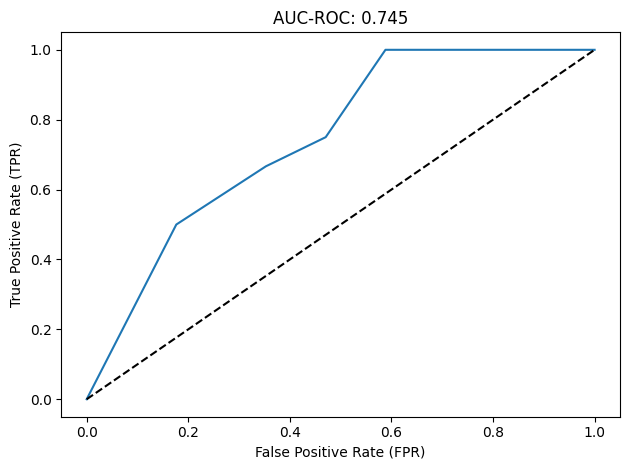

In [550]:
# Предсказания для AUC-ROC
predictions = []
for ind in range(len(df_test)):
    row = df_test.iloc[ind]
    predictions.append(dt.predict(row).mean()) # В качестве предсказания берем среднее значение

# Построение графиков
tp_rate, fp_rate, presision_rate, recall_rate = calculate_tpr_fpr(predictions, df_test[label])

auc = calculate_auc_roc(tp_rate, fp_rate)
plt.plot(fp_rate, tp_rate)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f"AUC-ROC: {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')

plt.tight_layout()
plt.show()


In [551]:
df_test["PREDICTED"] = predictions
df_test

,Cu1,Mo2,Ad3,At4,We5,GRADE,PREDICTED
36,4,4,1,1,1,0,0.000000
68,4,2,1,1,1,1,1.000000
5,4,2,2,1,1,0,0.200000
101,2,2,2,1,2,1,0.200000
54,5,4,2,1,2,0,1.000000
123,1,1,2,2,2,0,1.000000
99,2,2,2,1,3,1,0.200000
120,2,3,1,1,1,0,0.000000
1,2,2,1,1,2,0,0.500000
97,3,2,1,1,2,1,0.500000


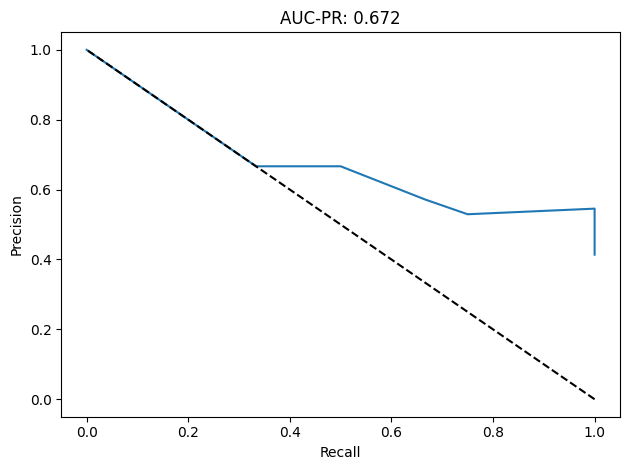

In [552]:
# Построение графиков AUC_PR
auc = calculate_auc_roc(presision_rate, recall_rate)
plt.plot(recall_rate, presision_rate)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f"AUC-PR: {auc:.3f}")
plt.plot([1, 0], [0, 1], 'k--')

plt.tight_layout()
plt.show()